# Project 4 - West Nile Virus Predictions

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn import model_selection

%matplotlib inline

# Load the Data

In [2]:
%pwd

'/Users/tomkelly/Desktop/general_assembly/DSI-US-5/project-4/tk'

In [3]:
df_train = pd.read_csv('../assets/train.csv')
df_test = pd.read_csv('../assets/test.csv')
df_spray = pd.read_csv('../assets/spray.csv')
df_weather = pd.read_csv('../assets/weather.csv')

# EDA - Train

In [4]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
df_train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [6]:
# Block numbers may be useful in establishing a 'central point' for a spatial analysis
# Lat & Long appear within a sensical range for an individual city
# Accuracy may need looked at - how close the Geocoder got to identifying the correct address location/block?
    # Why include it otherwise?

In [7]:
# No null values
df_train.isnull().sum().sort_values(ascending=False)

WnvPresent                0
NumMosquitos              0
AddressAccuracy           0
Longitude                 0
Latitude                  0
AddressNumberAndStreet    0
Trap                      0
Street                    0
Block                     0
Species                   0
Address                   0
Date                      0
dtype: int64

In [8]:
# Nothing appears to be assigned as a 'bad' data type, but that could prove wrong through further eval
df_train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [9]:
# Quick check to see if any of the address stuff correlates heavily with either NumMos or WNVPresent
df_train.corr()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Block,1.000000,0.091110,-0.090375,0.222134,-0.172388,0.004877
Latitude,0.091110,1.000000,-0.701795,0.444026,-0.184806,0.028697
Longitude,-0.090375,-0.701795,1.000000,-0.456775,0.036633,-0.060345
AddressAccuracy,0.222134,0.444026,-0.456775,1.000000,-0.248414,0.008064
NumMosquitos,-0.172388,-0.184806,0.036633,-0.248414,1.000000,0.196820
WnvPresent,0.004877,0.028697,-0.060345,0.008064,0.196820,1.000000


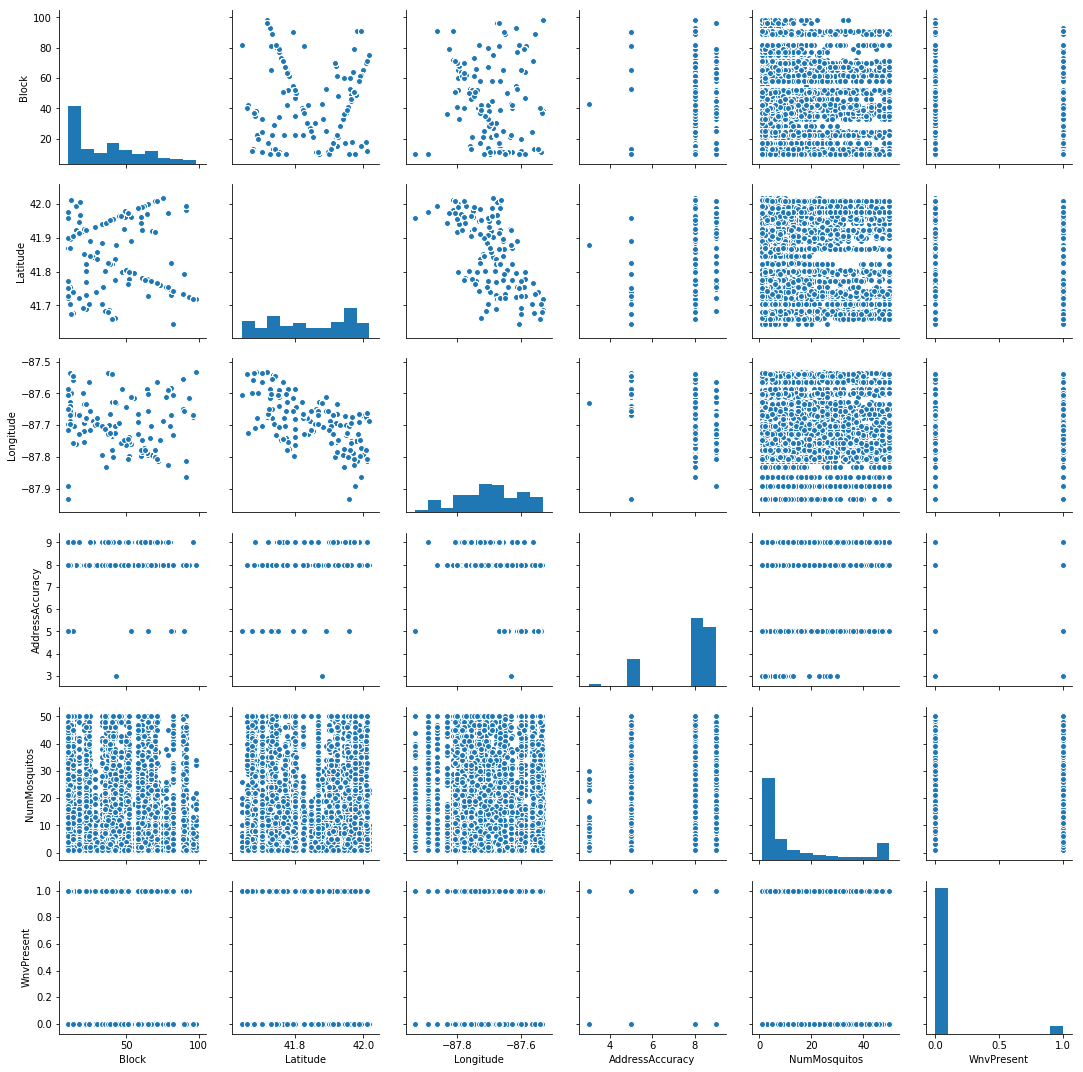

In [10]:
# Sometimes pairplot can show valuable relationships. 
# This does not seem to be one of those times.
sns.pairplot(df_train)

# EDA - Spray

In [39]:
df_spray.shape[0]

14835

In [11]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [12]:
# Quick check to make sure Lat/Long make sense:
df_spray.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


In [13]:
# Lots of nulls in the Time column
# Shouldn't matter too much, date should be enough
# So considering just assigning these to noon or midnight
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [14]:
lat = df_spray['Latitude'].values
lon = df_spray['Longitude'].values

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


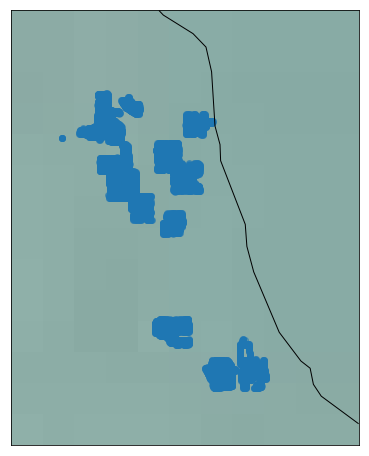

In [22]:
# Messing around with Basemap to visualize the spray locations
fig = plt.figure(figsize = (8, 8))
m = Basemap(projection='lcc', 
            resolution='h', 
            lat_0 = 41.88,
            lon_0 = -87.7,
            width = .4E5,
            height = .5E5)
m.shadedrelief()
# m.drawmapboundary(fill_color='aqua')
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()

m.scatter(lon, lat, latlon=True, cmap='Reds', alpha=0.5)

# EDA - Weather

In [27]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [28]:
df_weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [30]:
df_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Station,2944.0,1.500000,0.500085,1.0,1.0,1.5,2.0,2.0
Tmax,2944.0,76.166101,11.461970,41.0,69.0,78.0,85.0,104.0
Tmin,2944.0,57.810462,10.381939,29.0,50.0,59.0,66.0,83.0
DewPoint,2944.0,53.457880,10.675181,22.0,46.0,54.0,62.0,75.0
ResultSpeed,2944.0,6.960666,3.587527,0.1,4.3,6.4,9.2,24.1
ResultDir,2944.0,17.494905,10.063609,1.0,7.0,19.0,25.0,36.0


In [31]:
# No nulls
df_weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

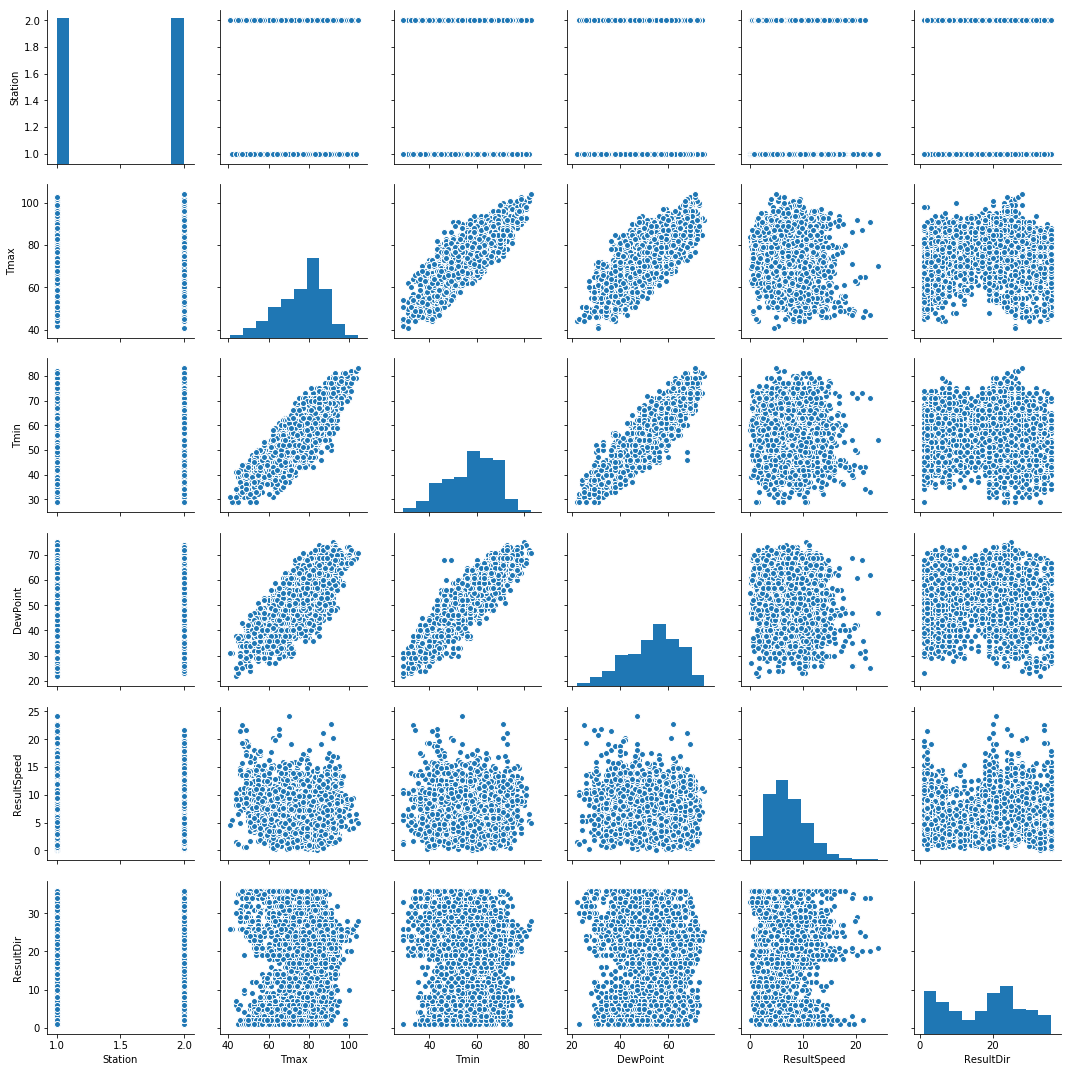

In [32]:
# Basic look, going to have to build some these out to find any value
sns.pairplot(df_weather)